In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import as_functions as asf
%matplotlib inline
sns.set_palette(sns.color_palette('muted'))
sns.set_style("darkgrid")

In [2]:
tppm = pd.read_csv('data/title_people_profs_merge.csv')
tn_movie_budgets = pd.read_csv("data/tn.movie_budgets.csv.gz", sep=',')

In [3]:
tppm.drop('Unnamed: 0', axis=1, inplace=True)
movies = tppm.drop_duplicates(subset=['title', 'start_year']).iloc[:, :34].copy()
movies = movies.drop(movies[movies.studio == 'HC'].index)
movies_sorted = movies.sort_values(by='total_gross', ascending=False)[:200]
top_10_studios = movies.groupby('studio').sum()['total_gross'].sort_values(ascending=False)[:10]
top_10_studios_mean = movies.groupby('studio').mean()['total_gross'].sort_values(ascending=False)[:10]

Text(0.5,1,'Total Gross by Studio')

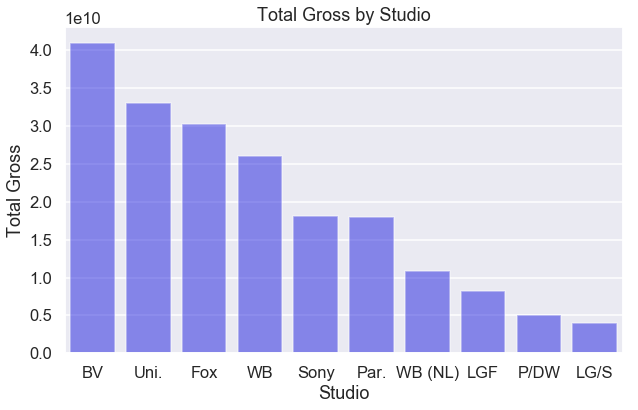

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_studios.index, y=top_10_studios, color='b', alpha=0.5)
plt.xlabel('Studio')
plt.ylabel("Total Gross")
plt.title("Total Gross by Studio")

Text(0.5,1,'Average Movie Gross by Studio')

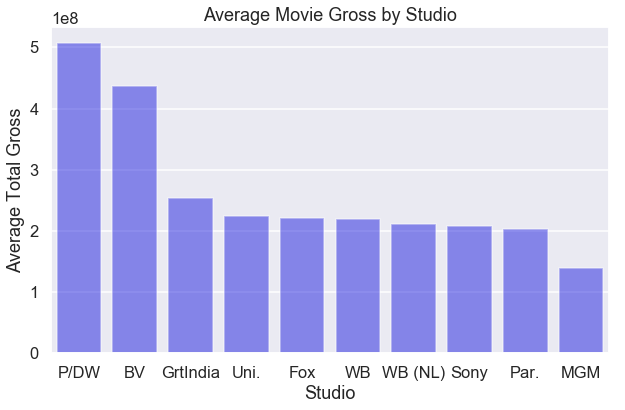

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_studios_mean.index, y=top_10_studios_mean, color='b', alpha=0.5)
plt.xlabel("Studio")
plt.ylabel("Average Total Gross")
plt.title("Average Movie Gross by Studio")

Here, we see that Paramount/Dreamworks and Buena Vista are the most successful studios on a per-movie basis, each making nearly twice as much per movie as the next set of studios. 

Next we will look at the genres of the top 200 grossing films from 2010-2018.

In [14]:
movies_sorted.iloc[:,11:33].sum().sort_values(ascending=False)

Adventure      138
Action         112
Comedy          63
Animation       51
Sci-Fi          47
Drama           39
Thriller        26
Fantasy         26
Family          11
Crime           10
Mystery          8
Horror           8
Biography        7
Documentary      6
Romance          4
History          3
Music            2
Musical          2
Sport            2
Western          1
War              0
News             0
dtype: int64

Adventure and Action films seem to dominate the box office, with roughly 70% of films being classified as Adventure, and 55% being classified as Action. It is important to note that in our dataset, an individual film could have more than one genre.

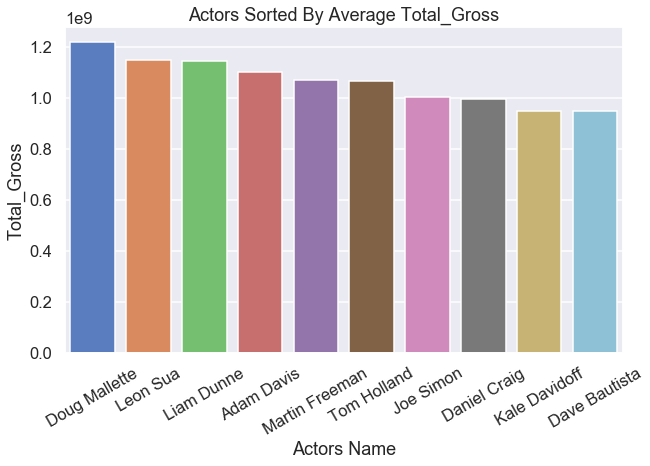

In [7]:
asf.plot_most_popular_people(tppm, 'actor', 'total_gross')

In [8]:
movie_genres = movies_sorted.iloc[:,11:33].stack().reset_index(level=1)
movie_genres.name = 'stacked_genres'
movies_with_genres = movies_sorted.join(movie_genres)
movies_with_genres = movies_with_genres[movies_with_genres[0] == 1]
top_grossing_genres = movies_with_genres.groupby('level_1')['total_gross'].sum().sort_values(ascending=False)

Text(0.5,1,'Total Gross by Genre')

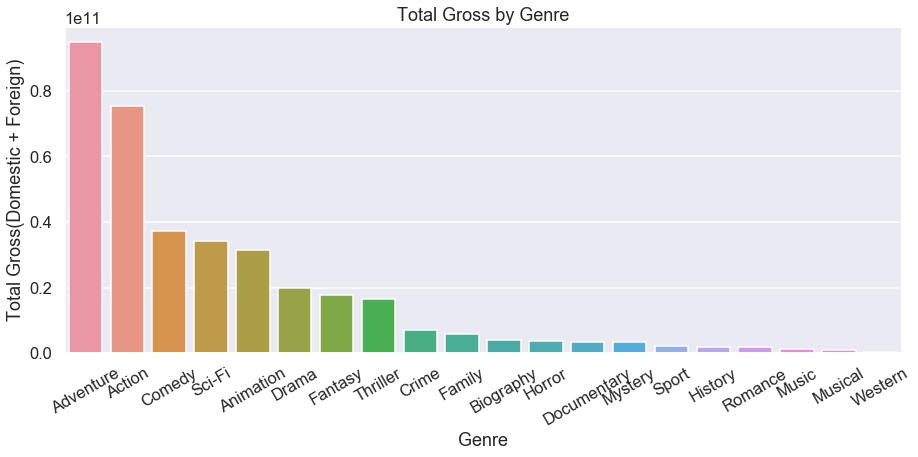

In [9]:
plt.figure(figsize=(15,6))
sns.barplot(x=top_grossing_genres.index, y=top_grossing_genres)
plt.xticks(rotation=30)
plt.xlabel('Genre')
plt.ylabel('Total Gross(Domestic + Foreign)')
plt.title('Total Gross by Genre')

Not surprisingly, Adventure and Action films bring in the most money as a whole. It seems that despite the large number of films in these genres, they still appear to do well for themselves.

We will now look at the per-film grossing of films in the 5 best-grossing genres.

Text(0.5,1,'Total Gross by Genre')

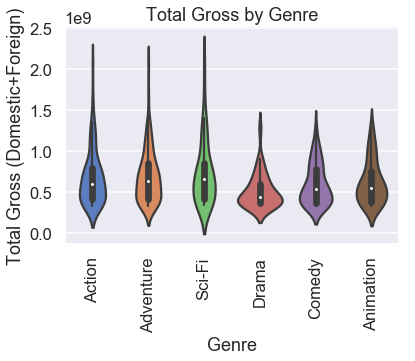

In [15]:
movies_with_genres_aasca = movies_with_genres[movies_with_genres['level_1'].isin(['Adventure', 
                                                                                 'Action', 
                                                                                 'Sci-Fi',
                                                                                 'Comedy',
                                                                                 'Animation'])]

x = sns.violinplot(x='level_1', y='total_gross', data=movies_with_genres_aasca, dpi=1200)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Total Gross (Domestic+Foreign)')
plt.title('Total Gross by Genre')

Looking at the genres on a per-movie basis, we see that the three genres of Action, Adventure, and Sci-Fi each perform very similarly to one another, with comedy and animation performing similar to one another, albeit selling less than the top 3 genres. This may be surprising considering the saturation of Action and Adventure films in the market, but it appears that despite the large number of films people still want to see many of them. 

In [11]:
tn2 = tn_movie_budgets.copy()
tn2[['production_budget',
     'domestic_gross',
     'worldwide_gross']] = tn2[['production_budget',
                                'domestic_gross',
                                'worldwide_gross']].applymap(lambda x: x.replace("$", '').replace(',', '')).astype(float)
               
tn2.drop(tn2[tn2.worldwide_gross == 0].index, inplace=True)
tn2[['log_prod', 'log_wwg']] = tn2[['production_budget', 'worldwide_gross']].applymap(np.log10)
tn2['gross_profit'] = tn2['worldwide_gross'] - tn2['production_budget']



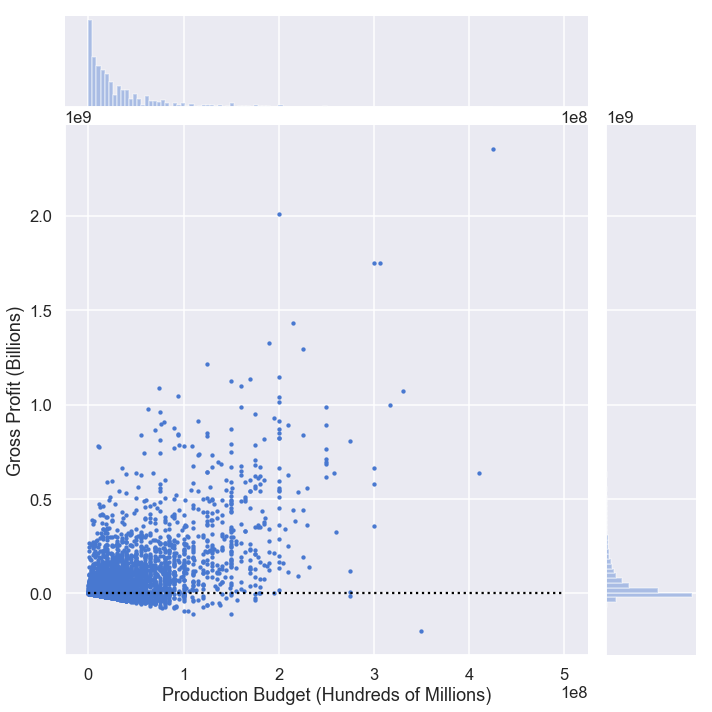

In [17]:
h = sns.jointplot(x='production_budget',
                  y='gross_profit',
                  data=tn2,
                  height=10,
                  s=8,
                 marginal_kws=dict(bins=100))
h.set_axis_labels("Production Budget (Hundreds of Millions)", "Gross Profit (Billions)")
h.ax_joint.plot([0,500_000_000], [0,0], ':k') 

The dotted line on the bottom separates films that lost money from thos that made a profit. The histogram on the right shows us that 